In [1]:
#!/usr/bin/env python3

import glob
import os
from os.path import join
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = True
ROOT = '/share/DEEPLEARNING/datasets/monuseg/'
TRAIN_IMG = join(ROOT,'MoNuSegTrainingData')
TEST_IMG = join(ROOT,'MoNuSegTestData')
if train:
    IMGS_DIR = join(TRAIN_IMG,'Tissue_Images')
    MASKS_DIR = join(TRAIN_IMG,'Binary_masks')
    OUTPUT_DIR = join(TRAIN_IMG,'Output')
else:
    IMGS_DIR = join(TEST_IMG,'Tissue_Images')
    MASKS_DIR = join(TEST_IMG,'Binary_masks')
    OUTPUT_DIR = join(TEST_IMG,'Output')
TARGET_SIZE = 51

In [3]:
from PIL import Image 

In [10]:
im_p = join(IMGS_DIR,'TCGA-18-5592-01Z-00-DX1.tif')
mask_p = join(MASKS_DIR,'TCGA-18-5592-01Z-00-DX1.png')

In [11]:
im = Image.open(im_p)
mask = Image.open(mask_p)

In [12]:
mask = np.array(mask)
#mask = np.where(mask != 2, 0, mask) 

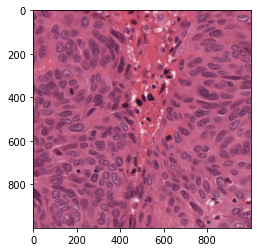

In [13]:
plt.imshow(im)

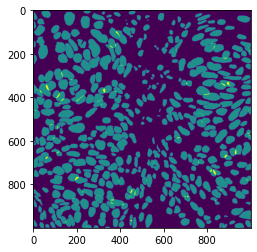

In [14]:
plt.imshow(np.array(mask))

In [9]:
np.unique(mask)

array([0, 2], dtype=uint8)